## Access Satellite GHRSST L3S 3Day day time Multi Sensor Australia (Zarr)
This Jupyter notebook demonstrates how to access and plot satellite_ghrsst_l3s_3day_daytime_multi_sensor_australia data, available as a [Zarr](https://zarr.dev/) dataset stored on S3.

🔗 More information about the dataset is available [in the AODN metadata catalogue](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/08e04227-4da1-479b-bec1-06ee27a69a40).

📌 The source of truth for this notebook is maintained on [GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_ghrsst_l3s_3day_daytime_multi_sensor_australia.ipynb).


In [1]:
dataset_name = "satellite_ghrsst_l3s_3day_daytime_multi_sensor_australia"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.11 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Using Python 3.12.11 environment at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised
Resolved 240 packages in 778ms
Audited 240 packages in 5ms
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


✅ Local version 0.3.2 is up to date (remote: 0.3.0)


In [3]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [4]:
# remote zarr dataset
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 1.29 s, sys: 127 ms, total: 1.42 s
Wall time: 2.61 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	time = 5017 ;
	lat = 4500 ;
	lon = 6000 ;

variables:
	float32 dt_analysis(time, lat, lon) ;
		dt_analysis:comment = The difference between this SST and the previous day's SST ;
		dt_analysis:long_name = deviation from last SST analysis ;
		dt_analysis:source = ABOM-L4LRfnd-GLOB-GAMSSA_28km ;
		dt_analysis:units = kelvin ;
		dt_analysis:valid_max = 127 ;
		dt_analysis:valid_min = -127 ;
	object filename(time) ;
	float32 l2p_flags(time, lat, lon) ;
		l2p_flags:comment = These flags are important to properly use the data.  Data not flagged as microwave are sourced from an infrared sensor. The lake and river flags are currently not set, but defined in GDS2.0r4. The aerosol flag indicates high aerosol concentration. The analysis flag indicates high difference from analysis temperatures (differences greater than Analysis Limit). The lowwind flag indicates regions of low wind speed (typically less than the low Wind Limit) per NWP model. The highwind flag indicat

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2012-01-01 03:20:00'), Timestamp('2025-11-16 03:20:00'))

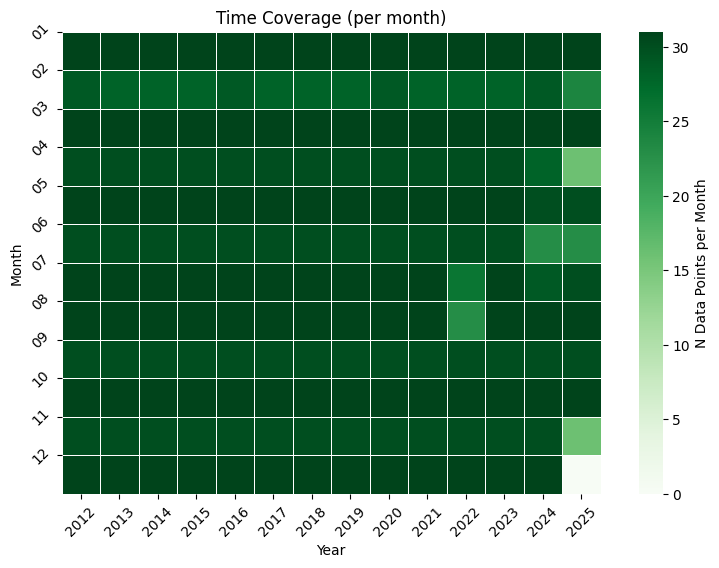

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:1469: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[self.var_name].resample(resample)


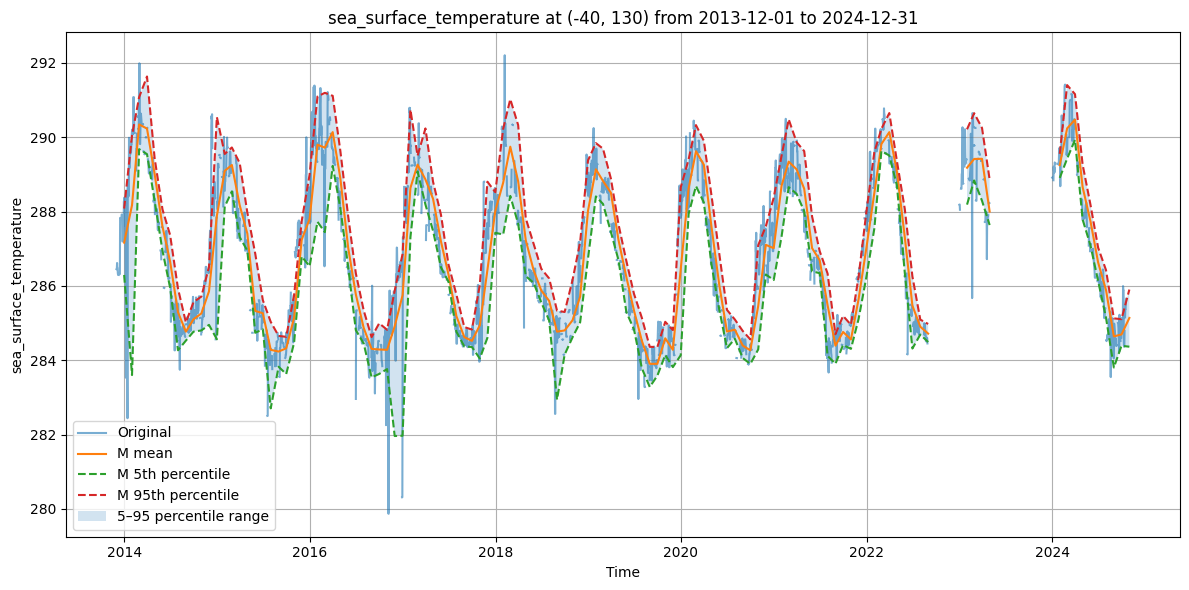

CPU times: user 14.7 s, sys: 3.2 s, total: 17.9 s
Wall time: 37.3 s


In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='sea_surface_temperature', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2013-12-01', 
                                                  date_end='2024-12-31', 
                                                  lon_name_override="lon", 
                                                  lat_name_override="lat").plot_timeseries()

## Plot a gridded variable

2025-12-11 10:10:03,258 - aodn.GetAodn - INFO - Plotting 'sea surface skin temperature' for 16 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2869: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


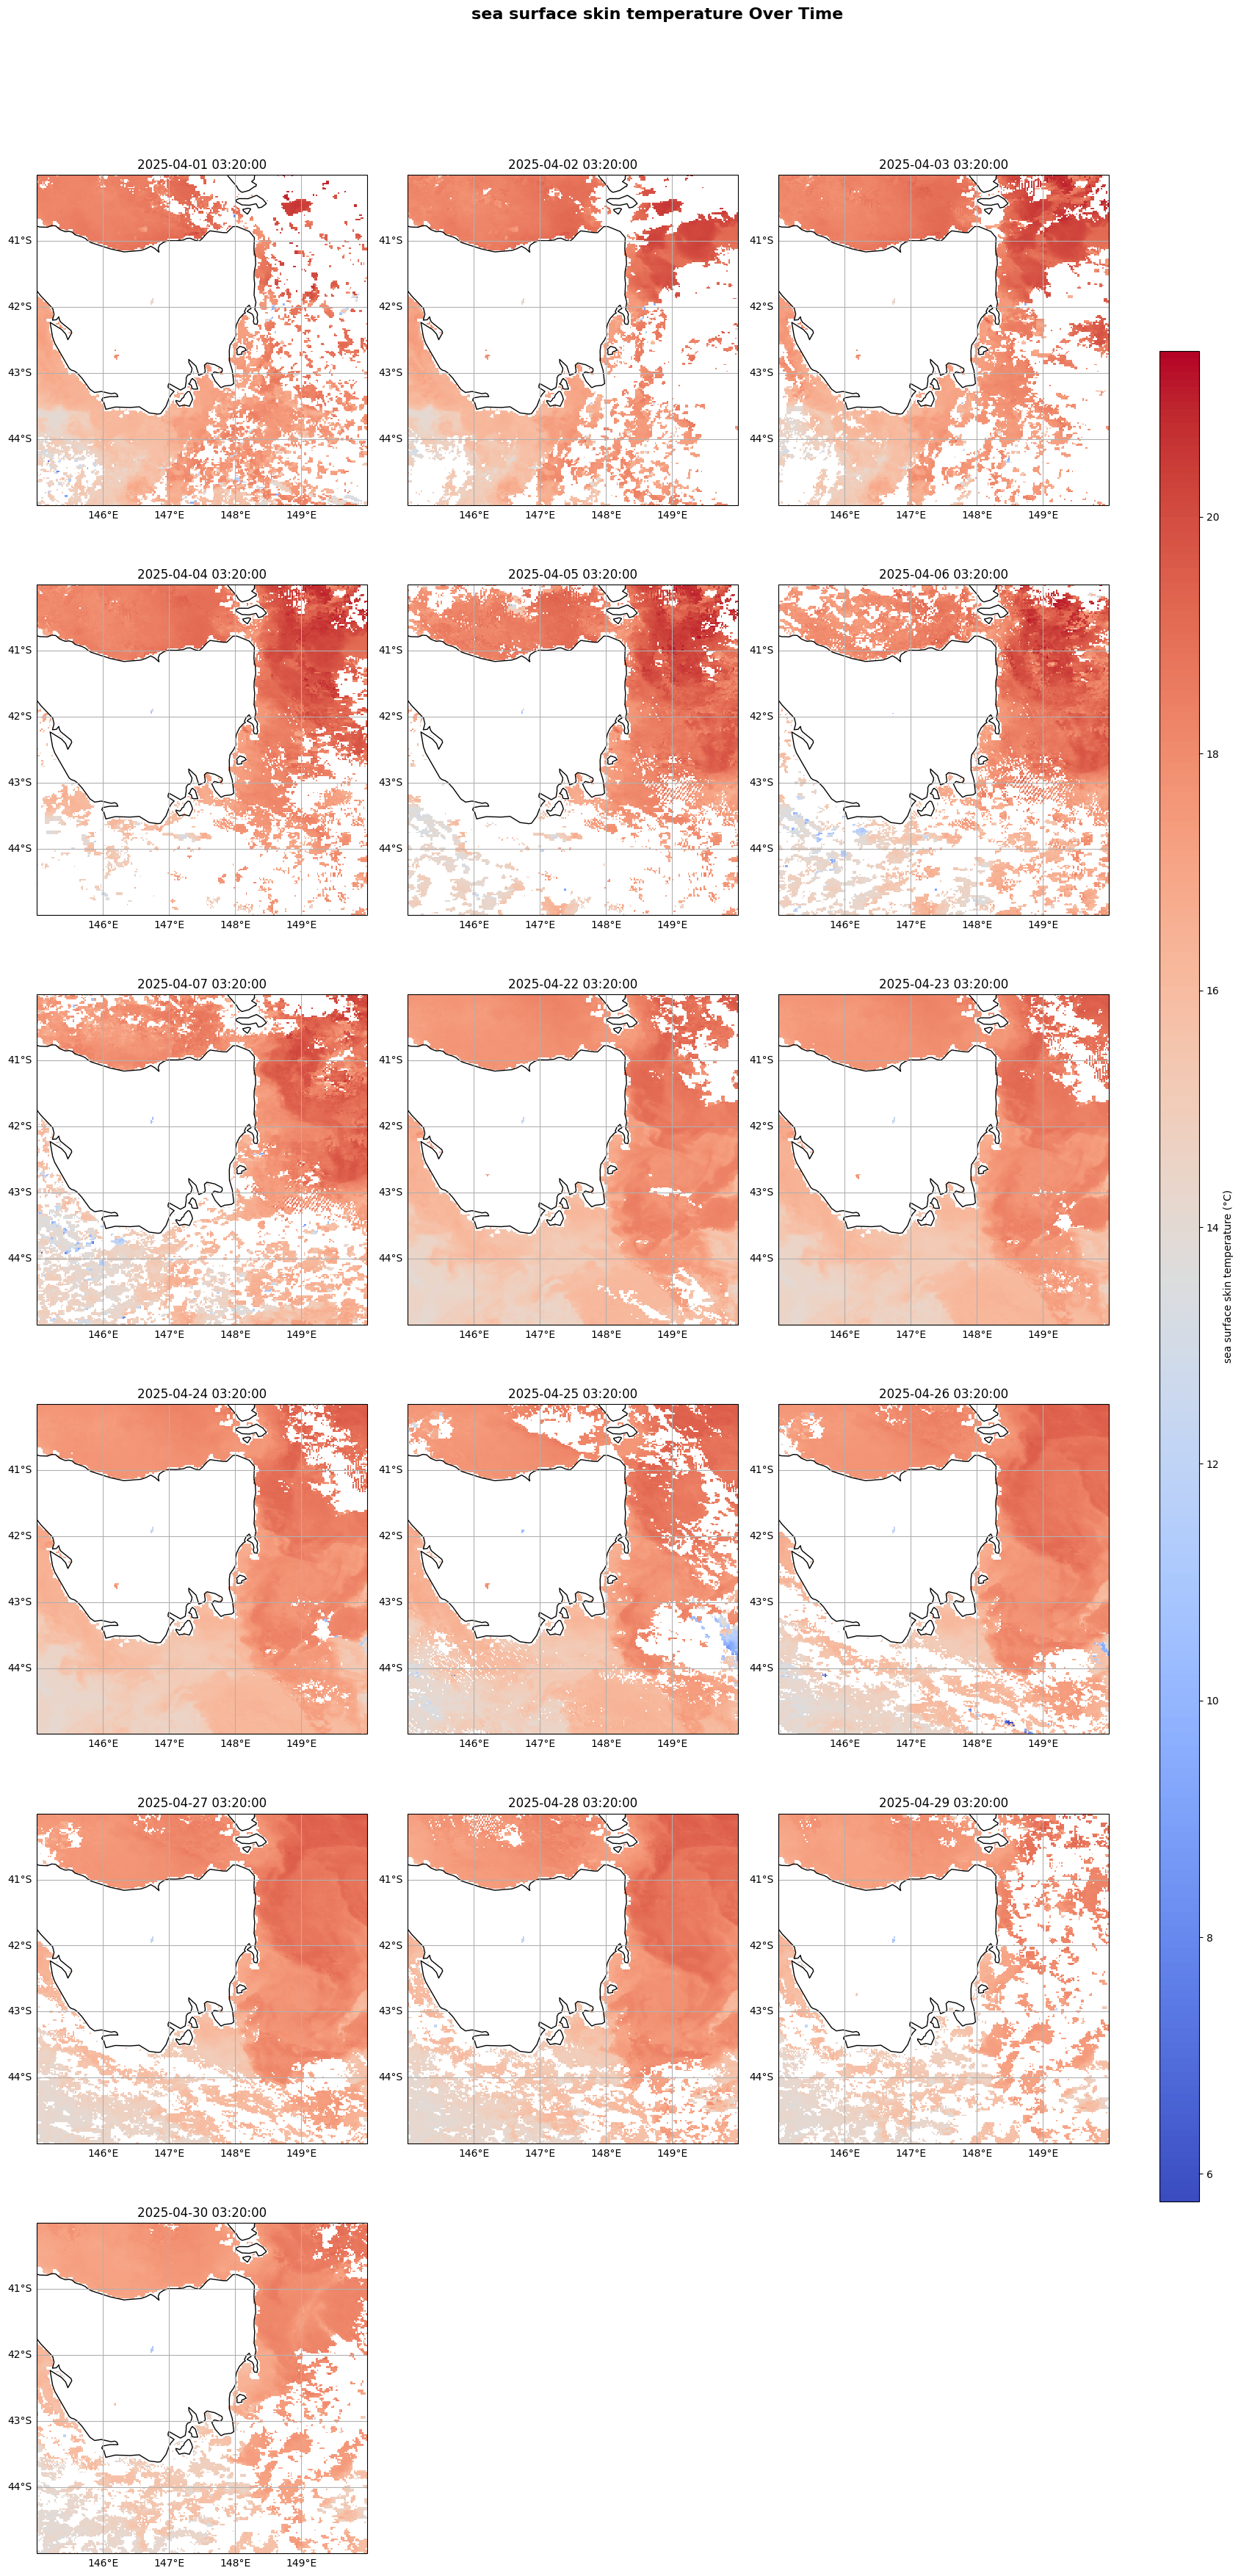

CPU times: user 8.46 s, sys: 5.3 s, total: 13.8 s
Wall time: 14.9 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sea_surface_temperature', 
                                                    date_start='2025-04-01',                                                
                                                    lon_name_override="lon", 
                                                    lat_name_override="lat", 
                                                    lon_slice=(145, 150), 
                                                    lat_slice=(-45, -40), 
                                                    n_days=16, 
                                                    coastline_resolution="50m", 
                                                    log_scale=False)

In [10]:
aodn_dataset.plot_gridded_variable_viewer_calendar(
    var_name="sea_surface_temperature",
    lon_slice=(145,149),
    lat_slice=(-44,-41),
    coastline_resolution="50m", 
    n_days=31,
)


In [11]:
#aodn_dataset.export_monthly_gridded_pngs(
#    var_name="sea_surface_temperature",
#    lon_slice=(145, 150),
#    lat_slice=(-45, -40),
#)